# Creación de un Perceptrón Multicapa de Tres Capas con `sklearn.neural_network`

En este notebook, aprenderás a crear un perceptrón multicapa (MLP, por sus siglas en inglés) de tres capas utilizando la librería `sklearn.neural_network`. Cubriremos todo el pipeline de la tarea de clasificación, desde la generación del dataset hasta la evaluación del modelo.

## Objetivos:
1. Generar un dataset sintético con al menos cinco variables independientes.
2. Dividir el dataset en conjuntos de entrenamiento y prueba.
3. Normalizar los datos.
4. Crear y entrenar un perceptrón multicapa de tres capas.
5. Evaluar el modelo utilizando la matriz de confusión y la curva de error.
6. Explicar cada función y sus argumentos.
7. Realizar predicciones con nuevos patrones de datos.

## Paso 1: Importación de Librerías

Primero, importamos las librerías necesarias para el proyecto.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

## Paso 2: Generación del Dataset

Utilizamos la función `make_classification` de `sklearn` para generar un dataset sintético con cinco variables independientes y dos clases.

In [36]:
# Generar dataset sintético
X, y = make_classification(
    n_samples=1000,  # Número de muestras
    n_features=5,    # Número de características (variables independientes)
    n_classes=2,     # Número de clases
    n_informative=5, # Características informativas
    n_redundant=0,   # Características redundantes
    random_state=42  # Semilla para reproducibilidad
)

# Convertir a DataFrame para visualización
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(5)])
df['Target'] = y

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.751790,3.184258,0.092019,1.227394,-0.997310,1
1,0.807304,1.126680,2.787603,1.988043,-0.331954,1
2,1.563154,-0.495054,1.727100,1.308530,-0.413501,1
3,3.002685,-0.547441,-0.087456,2.586871,0.608524,0
4,-0.684031,-0.556652,2.439790,-1.862443,2.160116,1


## Paso 3: División del Dataset

Dividimos el dataset en conjuntos de entrenamiento (70%) y prueba (30%).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (700, 5)
Tamaño del conjunto de prueba: (300, 5)


## Paso 4: Normalización de los Datos

Normalizamos los datos para que tengan media 0 y desviación estándar 1. Esto es importante para el entrenamiento de redes neuronales.

### ¿Por qué es importante normalizar los datos?
1. **Evitar el desequilibrio en las escalas**: Si las características tienen escalas muy diferentes (por ejemplo, una característica varía entre 0 y 1, y otra entre 0 y 1000), el modelo puede dar más importancia a las características con valores más grandes.
2. **Convergencia más rápida**: Los algoritmos de optimización, como el descenso de gradiente, convergen más rápido cuando los datos están normalizados.
3. **Estabilidad numérica**: La normalización ayuda a evitar problemas numéricos, como el desbordamiento (overflow) o el subdesbordamiento (underflow).

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Datos normalizados:")
print(X_train[:5])

Datos normalizados:
[[-0.09409809 -0.72925228  0.14952011  0.35198422  0.51881636]
 [ 2.19160541  0.18620021 -0.60144706 -0.46363492  1.48027261]
 [-0.41873193 -1.68345007 -0.23621336  0.25739317 -0.23987527]
 [ 0.10928149 -1.15567687 -0.17175446  0.61501446  0.15290009]
 [ 0.56172516  0.29836694  0.02060811 -0.27974637 -1.27013087]]


## Paso 5: Creación del Perceptrón Multicapa

Creamos un perceptrón multicapa de tres capas utilizando `MLPClassifier`. Las capas son:
- Capa oculta 1: 10 neuronas
- Capa oculta 2: 5 neuronas
- Capa de salida: 1 neurona (para clasificación binaria)

### Argumentos principales de `MLPClassifier`:
- `hidden_layer_sizes=(10, 5)`: Define dos capas ocultas con 10 y 5 neuronas, respectivamente.
- `activation='relu'`: Función de activación ReLU.
- `solver='adam'`: Optimizador Adam.
- `max_iter=1000`: Número máximo de iteraciones.
- `learning_rate_init=0.01`: Tasa de aprendizaje inicial.
- `random_state=42`: Semilla para reproducibilidad.

### ¿Qué es la función de activación ReLU?
La función de activación **ReLU** (Rectified Linear Unit) se define como:
\[\text{ReLU}(z) = \max(0, z)\]

Es una función no lineal que introduce no linealidad en el modelo, permitiendo que la red neuronal aprenda patrones complejos. Es ampliamente utilizada porque es computacionalmente eficiente y ayuda a mitigar el problema del **gradiente desaparecido**.

### ¿Por qué se usa el optimizador Adam?
**Adam** (Adaptive Moment Estimation) es un optimizador que combina las ventajas de dos métodos: **RMSProp** y **Momentum**. Es eficiente y funciona bien en la mayoría de los casos. Algunas de sus ventajas son:
1. **Adaptabilidad**: Ajusta automáticamente la tasa de aprendizaje durante el entrenamiento.
2. **Eficiencia**: Converge más rápido que otros optimizadores como el descenso de gradiente estándar.

### Otros optimizadores comunes:
- **SGD (Stochastic Gradient Descent)**: Descenso de gradiente estocástico. Es simple pero puede ser lento.
- **RMSProp**: Adapta la tasa de aprendizaje basándose en el promedio móvil de los gradientes recientes.
- **Adagrad**: Adapta la tasa de aprendizaje para cada parámetro, pero puede reducirla demasiado.
- **Adadelta**: Mejora de Adagrad que no requiere una tasa de aprendizaje inicial.

In [14]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),  # Dos capas ocultas con 10 y 5 neuronas
    activation='relu',           # Función de activación ReLU
    solver='adam',               # Optimizador Adam
    max_iter=1000,               # Número máximo de iteraciones
    learning_rate_init=0.01,     # Tasa de aprendizaje inicial
    random_state=42              # Semilla para reproducibilidad
)

# Entrenar el modelo
mlp.fit(X_train, y_train)
print("Entrenamiento completado.")

Entrenamiento completado.


## Paso 6: Predicciones y Evaluación

Realizamos predicciones en el conjunto de prueba y evaluamos el rendimiento del modelo.

In [16]:
# Predicciones
y_pred = mlp.predict(X_test)

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.95


## Paso 7: Matriz de Confusión

La **matriz de confusión** es una herramienta para evaluar el rendimiento de un modelo de clasificación. Muestra la cantidad de predicciones correctas e incorrectas para cada clase.

### Estructura:
|                     | Predicción: Clase 0 | Predicción: Clase 1 |
|---------------------|---------------------|---------------------|
| **Real: Clase 0**   | Verdaderos Negativos (TN) | Falsos Positivos (FP) |
| **Real: Clase 1**   | Falsos Negativos (FN) | Verdaderos Positivos (TP) |

### Métricas derivadas:
- **Precisión = TP / (TP + FP)**
- **Recall (Sensibilidad) = TP / (TP + FN)**
- **Exactitud = (TP + TN) / (TP + TN + FP + FN)**

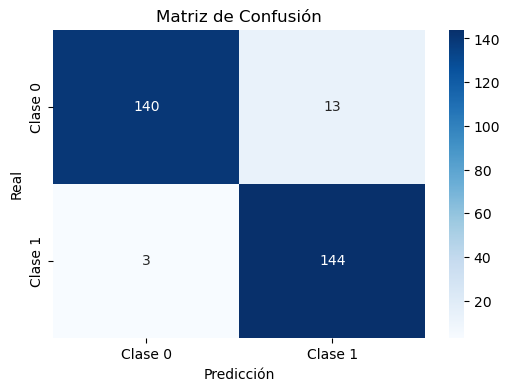

In [18]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

## Paso 8: Curva de Error

La **curva de error** muestra cómo disminuye el error durante el entrenamiento. Esto nos ayuda a verificar si el modelo está convergiendo correctamente.

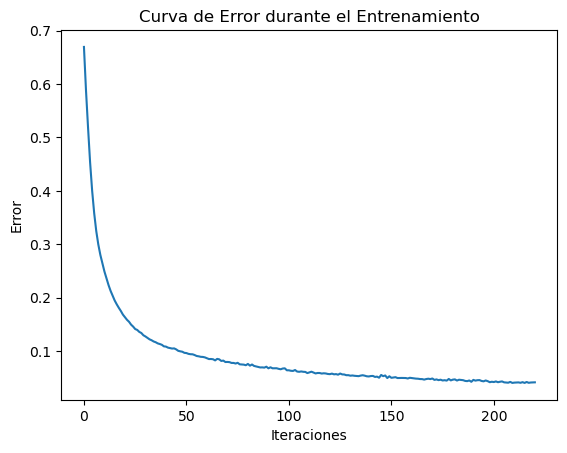

In [20]:
# Curva de error
plt.plot(mlp.loss_curve_)
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Curva de Error durante el Entrenamiento")
plt.show()

## Paso 9: Reporte de Clasificación

El **reporte de clasificación** proporciona métricas detalladas como precisión, recall y F1-score para cada clase.

### Interpretación de las métricas:
- **Precisión (Precision)**: Proporción de predicciones positivas correctas.
  $\text{Precisión} = \frac{\text{TP}}{\text{TP} + \text{FP}}$
- **Recall (Sensibilidad)**: Proporción de casos positivos correctamente identificados.
  $\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$
- **F1-score**: Media armónica de precisión y recall. Es útil cuando hay un desequilibrio entre clases.
  $\text{F1-score} = 2 \cdot \frac{\text{Precisión} \cdot \text{Recall}}{\text{Precisión} + \text{Recall}}$
- **Soporte (Support)**: Número de ocurrencias de cada clase en el conjunto de prueba.

In [22]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       153
           1       0.92      0.98      0.95       147

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Paso 10: Función para Realizar Predicciones

Creamos una función para realizar predicciones con nuevos patrones de datos y mostrar cómo el modelo los clasifica.

In [38]:
def predecir_nuevos_patrones(modelo, scaler):
    """
    Realiza predicciones con nuevos patrones de datos.
    
    Parámetros:
    - modelo: El modelo de red neuronal entrenado.
    - scaler: El escalador utilizado para normalizar los datos.
    """
    print("Ingresa los valores de las 5 características (separados por comas):")
    entrada = input("Ejemplo: 1.2, 0.5, -0.3, 2.1, 0.8\n")
    
    # Convertir la entrada en un arreglo numpy
    nuevo_patron = np.array([float(x) for x in entrada.split(",")]).reshape(1, -1)
    
    # Normalizar el nuevo patrón
    nuevo_patron_normalizado = scaler.transform(nuevo_patron)
    
    # Realizar la predicción
    prediccion = modelo.predict(nuevo_patron_normalizado)
    
    # Mostrar el resultado
    print(f"\nPredicción: {'Clase 1' if prediccion[0] == 1 else 'Clase 0'}")

# Ejemplo de uso
predecir_nuevos_patrones(mlp, scaler)

Ingresa los valores de las 5 características (separados por comas):


Ejemplo: 1.2, 0.5, -0.3, 2.1, 0.8
 0.807304,1.126680,2.787603,1.988043,-0.331954



Predicción: Clase 1
